In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
def scaleitright(d):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(d)
    df=pd.DataFrame(scaled,columns=d.columns)
    return df

# Actual running algo KMC

In [3]:
def show3d(df,A,mean):
    n=len(df)
    k=len(A[0])
    colm=["b","r","m","k","c"]
    
    y=np.zeros(n)
    for i in range(n):
        y[i]=np.where(A[i]==1)[0][0]
    
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(df['x1'],df['x2'] , df['x3'], c = y,s=2)
    
    
    
    plt.scatter(mean[:,0],mean[:,1],mean[:,2],c=colm[:k],s=20,marker="^")
    plt.show()
    
    
def show(df,A,mean):
    n=len(df)
    k=len(A[0])
    colm=["b","r","m","k","c","g"]
    y=np.zeros(n)
    for i in range(n):
        y[i]=np.where(A[i]==1)[0][0]
    plt.scatter(df['x1'],df['x2'],c=y,s=2)
    plt.scatter(mean[:,0],mean[:,1],c=colm[:k],s=20,marker="^")
    plt.show()
    
    
    
    
    
    
    

In [4]:
import math

def distance(point1,point2):
    return np.linalg.norm(point1 - point2)


def k_means(df,k=2,d=2):
    n=len(df)
    mean=np.random.uniform(size=(k,d))
    print("Random mean:")
    print(mean)
    print("-------------------------------------------------------------------")
    print("final mean :")
    A = np.zeros([n,k], dtype = int)
    change=1
    
    for i in range(n):
        t=df.values[i]
        mind=-1
        mindis=math.inf
        for j in range(k):
            ggg=distance(t,mean[j])
            if mindis>ggg:
                mindis=ggg
                mind=j
        A[i][mind]=1
    
    
    iter=0
    while change==1:
        
        change=0
        for j in range(k):
            t=np.zeros(d)
            c=0
            for i in range(n):
                if A[i][j]==1:
                    t+=df.values[i]
                    c+=1
                    
            while c==0:
                return k_means(df,k,d)
            mean[j]=t*(1/c)
                
        iter+=1
        
        for i in range(n):
            
            t=df.values[i]
            prevind=-1
            mind=-1
            mindis=math.inf
            for j in range(k):
                if A[i][j]==1:
                    prevind=j
                ggg=distance(t,mean[j])
                if mindis>ggg:
                    mindis=ggg
                    mind=j
            if prevind!=mind:
                change=1
            A[i][prevind]=0
            A[i][mind]=1
    print(mean)
    print("----------------------")
    print(f"converges in iterations:{iter}")
    if d==2:
        show(df,A,mean)
    if d==3:
        show3d(df,A,mean)
    
    r=[np.where(A[i]==1)[0][0] for i in range(n)]
    return np.array(r)
    
    
            
            
    


## EXPERIMENT 1 2 3 

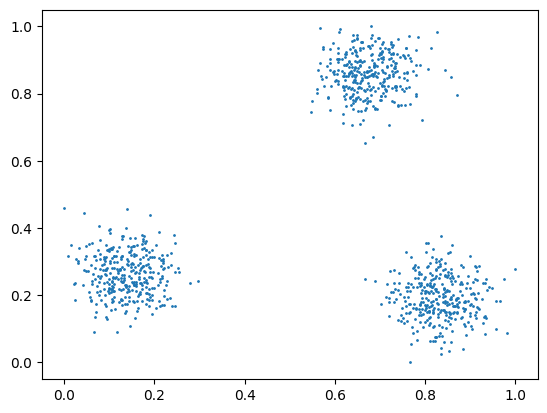

In [5]:
from sklearn.datasets import make_blobs
centers = 3
X_train, true_labels = make_blobs(n_samples=1000, centers=centers,random_state=67)
dfn = pd.DataFrame(X_train, columns=['x1', 'x2'])
#print(X_train,true_labels)
dfn=scaleitright(dfn)
dfn.head()
plt.scatter(dfn['x1'],dfn['x2'],s=1)

In [6]:
dfn

,x1,x2
0,0.666460,0.249290
1,0.733921,0.821269
2,0.089129,0.235111
3,0.061642,0.234272
4,0.105612,0.336962
...,...,...
995,0.895467,0.182419
996,0.606718,0.919774
997,0.719419,0.903989
998,0.733468,0.863323


Random mean:
[[0.01461997 0.29081431]
 [0.25148439 0.45915253]
 [0.07311487 0.75551301]]
-------------------------------------------------------------------
final mean :
[[0.13799308 0.26387132]
 [0.83155175 0.19225431]
 [0.67531124 0.8594017 ]]
----------------------
converges in iterations:3


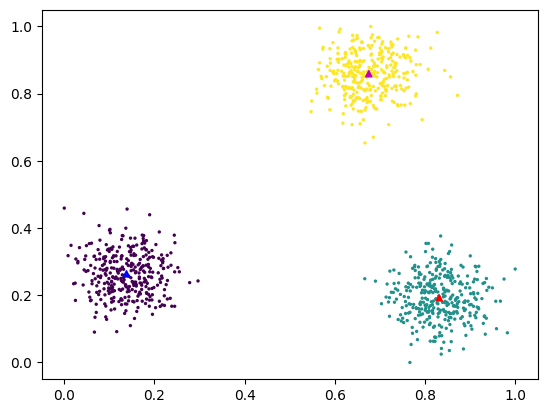

array([1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2,
       1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1,
       2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 2,
       0, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2,
       1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0,

In [7]:
k_means(dfn,3)

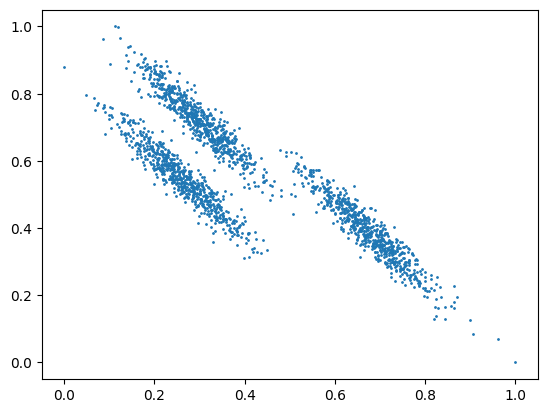

In [8]:
centers = 3
X, y = make_blobs(n_samples=2000, centers=centers,random_state=170)
t=[[0.60834,-0.63667],[-0.40887,0.85253]]
Xn=np.dot(X,t)
X_n = pd.DataFrame(Xn, columns=['x1', 'x2'])
#print(X_train,true_labels)
X_n.head()
X_n=scaleitright(X_n)

plt.scatter(X_n['x1'],X_n['x2'],s=1)

Random mean:
[[0.68533679 0.75984737]
 [0.16030875 0.89141381]
 [0.31450523 0.60022821]]
-------------------------------------------------------------------
final mean :
[[0.6818257  0.37947682]
 [0.24482951 0.73642706]
 [0.32059031 0.53559699]]
----------------------
converges in iterations:18


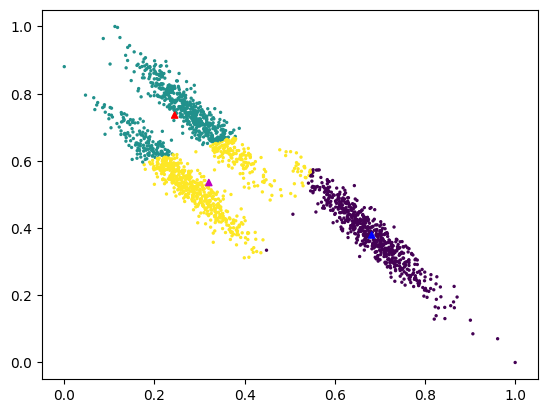

array([2, 1, 0, ..., 0, 0, 1])

In [9]:
k_means(X_n,3)

In [10]:
clm = ['x1','x2']

df = pd.read_csv("Assignment5Dataset.csv",names=clm, header=None)
df.drop([0],axis=0,inplace=True)
df['x1'] = df['x1'].astype(float)
df['x2'] = df['x2'].astype(float)
df.head()


,x1,x2
1,0.674362,-0.444625
2,1.547129,-0.239796
3,1.601930,-0.230792
4,0.014563,0.449752
5,1.503476,-0.389164


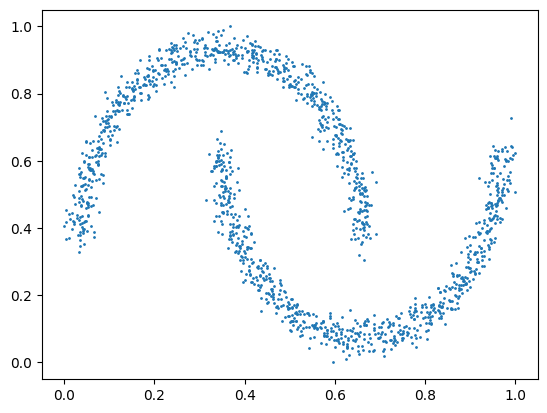

In [11]:
df=scaleitright(df)
plt.scatter(df['x1'],df['x2'],s=1)

Random mean:
[[0.02491605 0.31493656]
 [0.26458782 0.33160644]
 [0.71788023 0.81031302]]
-------------------------------------------------------------------
final mean :
[[0.19670084 0.54197205]
 [0.72209245 0.26650115]
 [0.41022908 0.83944079]]
----------------------
converges in iterations:18


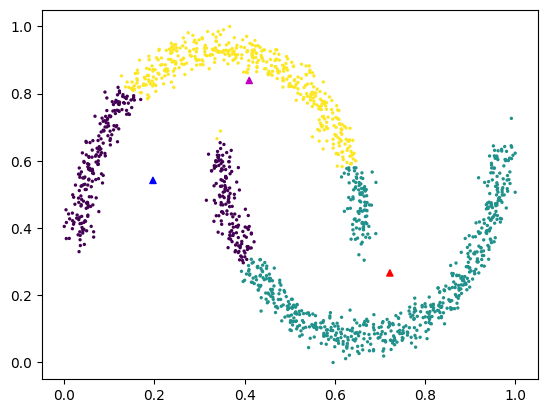

array([1, 1, 1, ..., 0, 1, 0])

In [12]:
k_means(df,3)